In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
data = pd.read_csv('Data\iot_water_thanhhoa.csv')

In [3]:
data.head()

,projectid,deviceid,regionid,parameterid,device_key,parameter_key,ts,bool_v,str_v,long_v,dbl_v,json_v,extra
0,663deefc44186bcf3f31b24d,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444818,NaN,NaN,NaN,2.33,NaN,NaN
1,663deefc44186bcf3f31b24d,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444828,NaN,NaN,NaN,2.31,NaN,NaN
2,663deefc44186bcf3f31b24d,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444838,NaN,NaN,NaN,2.31,NaN,NaN
3,663deefc44186bcf3f31b24d,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444848,NaN,NaN,NaN,2.30,NaN,NaN
4,663deefc44186bcf3f31b24d,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444858,NaN,NaN,NaN,2.34,NaN,NaN


In [4]:
data.shape

(2356385, 13)

In [5]:
data.columns

Index(['projectid', 'deviceid', 'regionid', 'parameterid', 'device_key',
       'parameter_key', 'ts', 'bool_v', 'str_v', 'long_v', 'dbl_v', 'json_v',
       'extra'],
      dtype='object')

In [6]:
data = data[['deviceid', 'regionid', 'parameterid', 'device_key', 'parameter_key', 'ts', 'dbl_v']]

In [7]:
data.head()

,deviceid,regionid,parameterid,device_key,parameter_key,ts,dbl_v
0,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444818,2.33
1,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444828,2.31
2,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444838,2.31
3,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444848,2.30
4,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444858,2.34


In [8]:
data['datetime'] = pd.to_datetime(data['ts'], unit='s')

In [9]:
data.head()

,deviceid,regionid,parameterid,device_key,parameter_key,ts,dbl_v,datetime
0,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444818,2.33,2024-09-16 00:00:18
1,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444828,2.31,2024-09-16 00:00:28
2,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444838,2.31,2024-09-16 00:00:38
3,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444848,2.30,2024-09-16 00:00:48
4,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444858,2.34,2024-09-16 00:00:58


In [10]:
mapping = {
    'Pressure': 'Áp lực', 'Pressure1': 'Áp lực', 'P': 'Áp lực', 'PS1': 'Áp lực',
    'Flow 1': 'Lưu lượng thuận', 'Flow1': 'Lưu lượng thuận', 'Q': 'Lưu lượng thuận', 'FF1': 'Lưu lượng thuận',
    'Flow 2': 'Lưu lượng nghịch', 'Flow2': 'Lưu lượng nghịch', 'RF1': 'Lưu lượng nghịch', 'ReverseFlowSum': 'Lưu lượng nghịch',
    'ForwardIndex': 'Chỉ số thuận', 'Input1_J1': 'Chỉ số thuận',
    'SignalStrength': 'Cường độ sóng',
    'Vbat': 'Dung lượng pin',
    'Temperature': 'Nhiệt độ',
    'Net': 'Chỉ số Net',
    'RIN': 'Chỉ số nghịch'
}

In [11]:
data['parameter'] = data['parameter_key'].replace(mapping, inplace=False)

In [12]:
list_deviceid = ['66d92f94b7f41dd37df0634a']
                #  '66d92f94b7f41dd37df0634a','66d92fabb7f41dd37df06351','66d92fc2b7f41dd37df06355',
                #  '66d92fc6b7f41dd37df06359','66d92fcbb7f41dd37df0635d','66d92fcfb7f41dd37df06361']


In [13]:
data_deviceid_second = data[data['deviceid'].isin(list_deviceid)]

In [14]:
data_deviceid_second.head()

,deviceid,regionid,parameterid,device_key,parameter_key,ts,dbl_v,datetime,parameter
0,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444818,2.33,2024-09-16 00:00:18,Áp lực
1,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444828,2.31,2024-09-16 00:00:28,Áp lực
2,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444838,2.31,2024-09-16 00:00:38,Áp lực
3,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444848,2.30,2024-09-16 00:00:48,Áp lực
4,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444858,2.34,2024-09-16 00:00:58,Áp lực


In [15]:
data_deviceid_second_apluc = data_deviceid_second[data_deviceid_second['parameter'] == 'Áp lực']

In [16]:
data_deviceid_second_apluc.head()

,deviceid,regionid,parameterid,device_key,parameter_key,ts,dbl_v,datetime,parameter
0,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444818,2.33,2024-09-16 00:00:18,Áp lực
1,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444828,2.31,2024-09-16 00:00:28,Áp lực
2,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444838,2.31,2024-09-16 00:00:38,Áp lực
3,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444848,2.30,2024-09-16 00:00:48,Áp lực
4,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444858,2.34,2024-09-16 00:00:58,Áp lực


In [17]:
data_deviceid_second_apluc.shape

(248418, 9)

In [18]:
data_deviceid_second_apluc.describe()

,ts,dbl_v,datetime
count,248418.00,248418.00,248418
mean,1726397755.90,2.46,2024-09-15 10:55:55.900611072
min,1725148810.00,-0.29,2024-09-01 00:00:10
25%,1725773612.50,2.31,2024-09-08 05:33:32.500000
50%,1726397714.00,2.48,2024-09-15 10:55:14
75%,1727022172.50,2.60,2024-09-22 16:22:52.500000
max,1727646114.00,2.92,2024-09-29 21:41:54
std,720884.80,0.20,NaN


In [19]:
data_deviceid_second_apluc.describe(include='O')

,deviceid,regionid,parameterid,device_key,parameter_key,parameter
count,248418,248418,248418,248418,248418,248418
unique,1,1,1,2,1,1
top,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,Áp lực
freq,248418,248418,248418,154685,248418,248418


In [20]:
data_deviceid_second_apluc['minute'] = data_deviceid_second_apluc['datetime'].dt.minute
data_deviceid_second_apluc['hour']   = data_deviceid_second_apluc['datetime'].dt.hour
data_deviceid_second_apluc['minute'] = data_deviceid_second_apluc['minute'] + data_deviceid_second_apluc['hour']*60
data_deviceid_second_apluc['day'] = data_deviceid_second_apluc['datetime'].dt.day
display(data_deviceid_second_apluc.head())

,deviceid,regionid,parameterid,device_key,parameter_key,ts,dbl_v,datetime,parameter,minute,hour,day
0,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444818,2.33,2024-09-16 00:00:18,Áp lực,0,0,16
1,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444828,2.31,2024-09-16 00:00:28,Áp lực,0,0,16
2,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444838,2.31,2024-09-16 00:00:38,Áp lực,0,0,16
3,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444848,2.30,2024-09-16 00:00:48,Áp lực,0,0,16
4,66d92f94b7f41dd37df0634a,66d7caf0af92100034e658b5,66d92f94b7f41dd37df0634b,3600001,P,1726444858,2.34,2024-09-16 00:00:58,Áp lực,0,0,16


In [21]:
def SensorViz(df, feature_X, feature_y, savefig = False):
    plt.figure(figsize=(20,5))
    plt.scatter(df[feature_X],df[feature_y])
    plt.plot(df[feature_X],df[feature_y])
    plt.title(f'{feature_X} Vs {feature_y}')
    plt.xlabel(feature_X)
    plt.ylabel(feature_y)
    plt.grid()
    if(savefig):
        plt.savefig(f'{feature_X} Vs {feature_y} Analysis.jpg')

In [22]:
def BoxPlot(df, feature_X, feature_y):
    plt.figure(figsize=(20, 5))
    sns.boxplot(x=feature_X, y=feature_y, data=df)
    plt.title(f"Boxplot of {feature_y} by {feature_X}")
    plt.xlabel(feature_X)
    plt.ylabel(feature_y)
    plt.grid()
    plt.show()


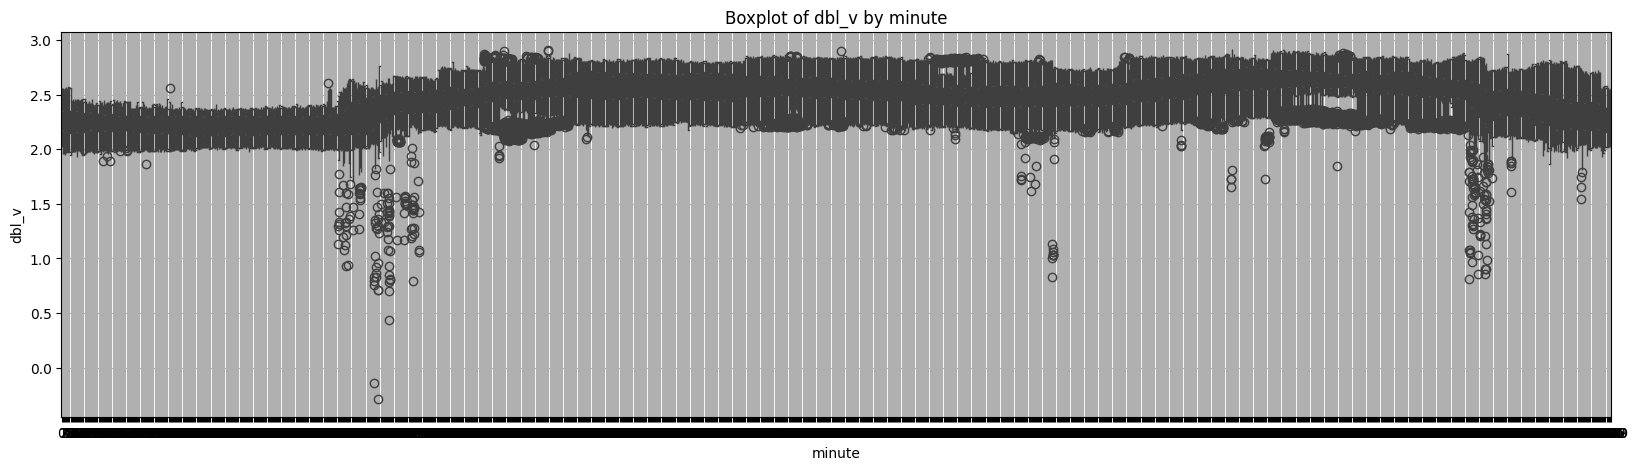

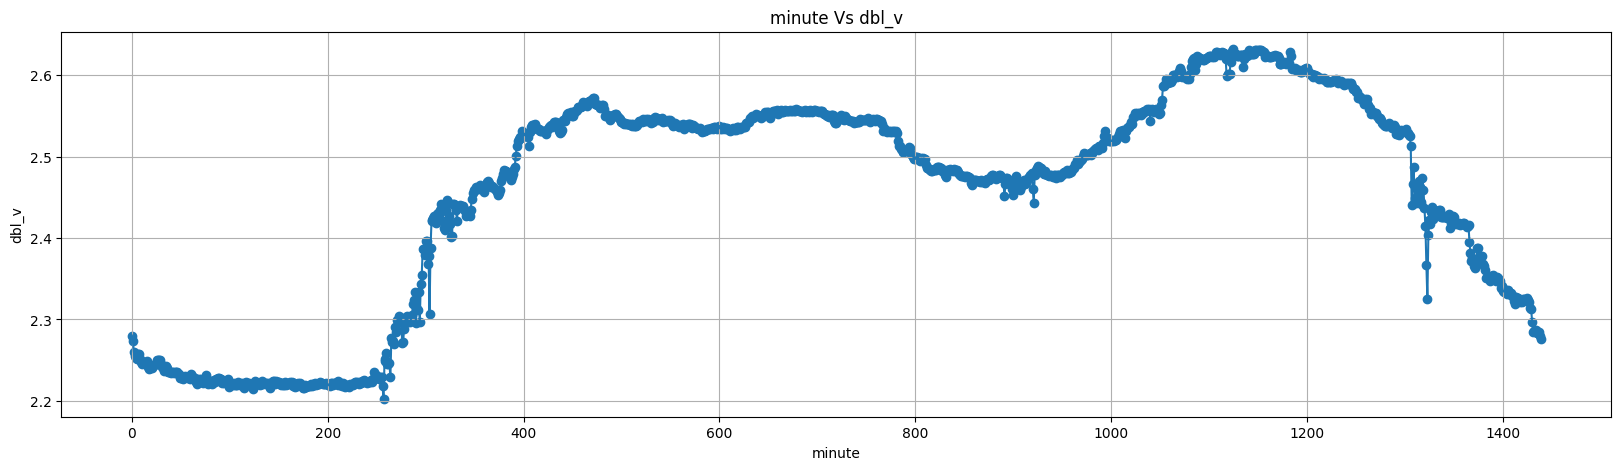

In [23]:
feature_y = "dbl_v"
feature_X = "minute"


BoxPlot(data_deviceid_second_apluc, feature_X, feature_y)
data_group = data_deviceid_second_apluc[[feature_X, feature_y]].groupby(feature_X,as_index=False).mean()
SensorViz(data_group, feature_X, feature_y)

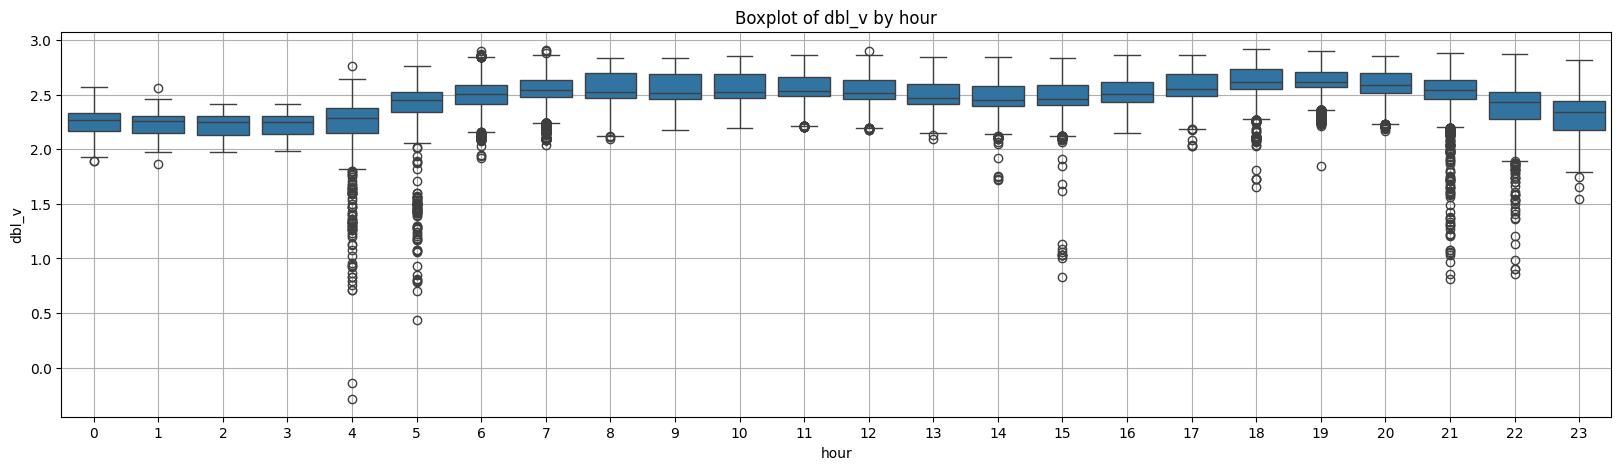

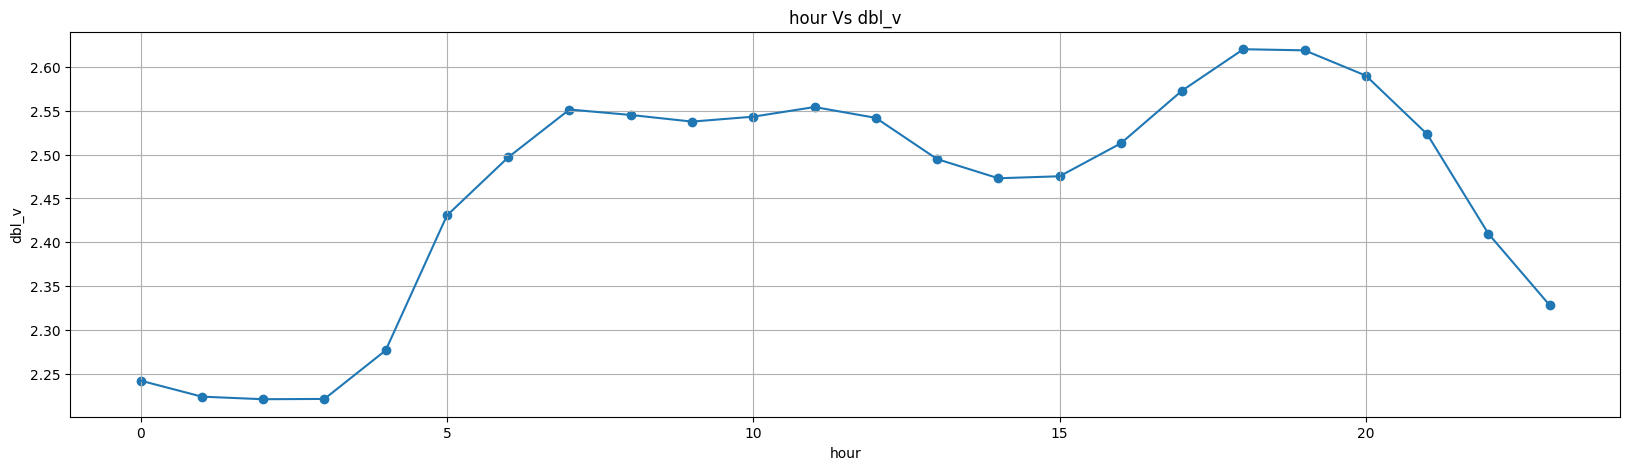

In [24]:
feature_X = "hour"

BoxPlot(data_deviceid_second_apluc,feature_X,feature_y)
data_group = data_deviceid_second_apluc[[feature_X, feature_y]].groupby(feature_X,as_index=False).mean()
SensorViz(data_group, feature_X, feature_y)

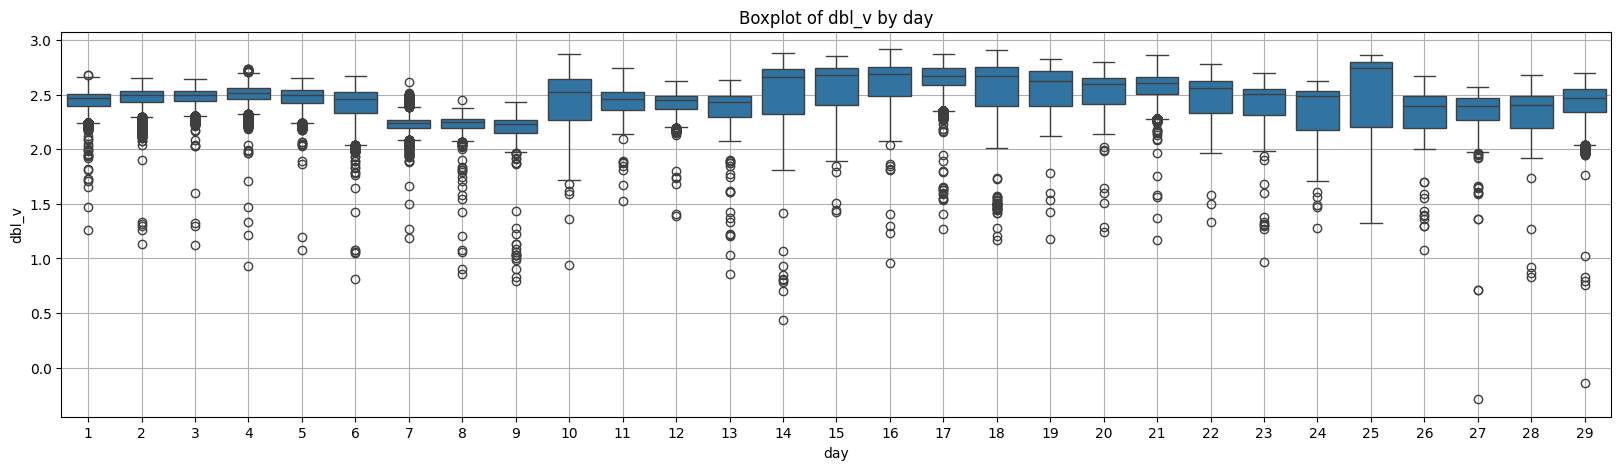

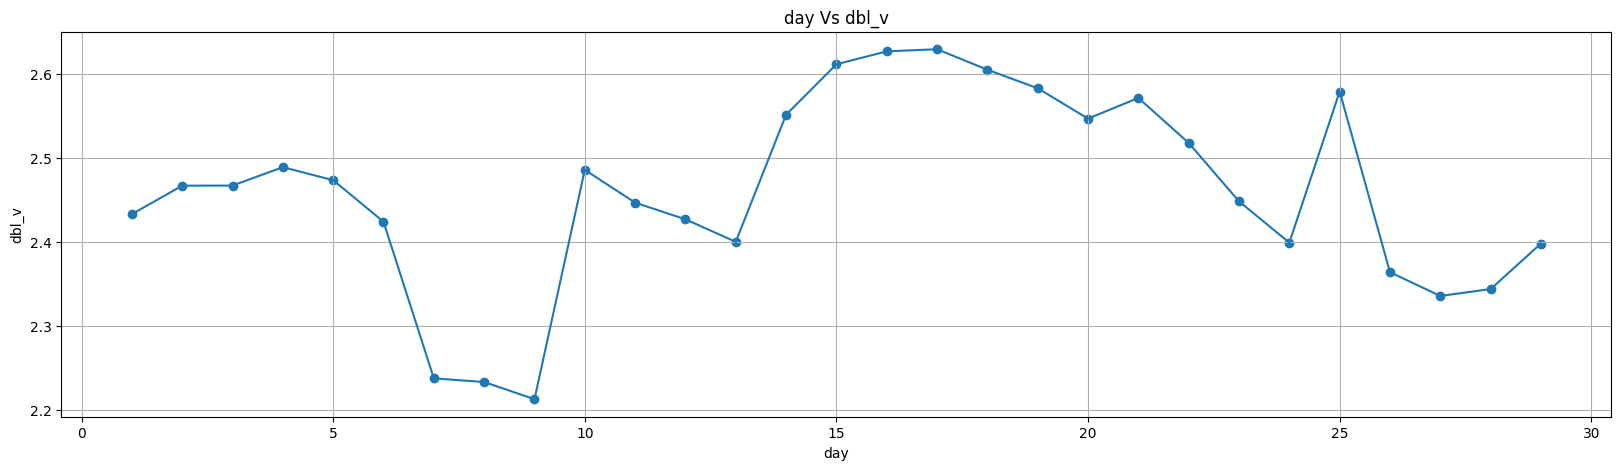

In [25]:

feature_X = "day"
BoxPlot(data_deviceid_second_apluc,feature_X,feature_y)
data_group = data_deviceid_second_apluc[[feature_X, feature_y]].groupby(feature_X,as_index=False).mean()
SensorViz(data_group, feature_X, feature_y)

In [26]:
feature_X = 'minute'
feature_y = 'dbl_v'
data_group = data_deviceid_second_apluc[[feature_X, feature_y]].groupby(feature_X,as_index=False).mean()

print(data_group)
X=data_group[[feature_X]].values
y=data_group[feature_y].values

print(type(X))
print(X)
print(type(y))
print(y)

      minute  dbl_v
0          0   2.28
1          1   2.27
2          2   2.26
3          3   2.25
4          4   2.25
...      ...    ...
1435    1435   2.28
1436    1436   2.28
1437    1437   2.29
1438    1438   2.28
1439    1439   2.28

[1440 rows x 2 columns]
<class 'numpy.ndarray'>
[[   0]
 [   1]
 [   2]
 ...
 [1437]
 [1438]
 [1439]]
<class 'numpy.ndarray'>
[2.28028947 2.27391954 2.26022414 ... 2.28514557 2.27918125 2.27558642]


In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
poly_reg = poly_reg.fit(X)

In [28]:
import joblib

# Lưu đối tượng poly_reg vào file
joblib.dump(poly_reg, 'poly_reg_model.pkl')

['poly_reg_model.pkl']

In [29]:
# Tải lại đối tượng poly_reg từ file
poly_reg = joblib.load('poly_reg_model.pkl')

# Sử dụng lại với dữ liệu mới
X_poly = poly_reg.transform(X)
print(X_poly[:5])

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]]


In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [31]:
print("Incorrect Input :", X_poly[0])
print("Correct Input :", X_poly[0].reshape(1, -1))
print("Output : ", lin_reg.predict(X_poly[0].reshape(1, -1)))

Incorrect Input : [1. 0. 0. 0. 0. 0.]
Correct Input : [[1. 0. 0. 0. 0. 0.]]
Output :  [2.29724922]


In [32]:
y_predict = lin_reg.predict(poly_reg.fit_transform(X))
print(f"true {feature_y} value : \n {y}")
print(f"predicted {feature_y} value : \n {y_predict}")

true dbl_v value : 
 [2.28028947 2.27391954 2.26022414 ... 2.28514557 2.27918125 2.27558642]
predicted dbl_v value : 
 [2.29724922 2.29489742 2.2925777  ... 2.17446123 2.16947265 2.16444284]


In [33]:
def SensorVizWithPrediction(df, feature_X, feature_y, y_predict, savefig = False):
    plt.figure(figsize=(18,5))
    plt.scatter(df[feature_X],df[feature_y])
    plt.plot(df[feature_X],df[feature_y])
    plt.plot(df[feature_X], y_predict, color = 'red', linewidth=5)
    plt.title(f'{feature_X} Vs {feature_y}', size = 20)
    plt.xlabel(feature_X, size = 20)
    plt.ylabel(feature_y, size = 20)
    plt.grid()
    if(savefig):
        plt.savefig(f'{feature_X} Vs {feature_y} Analysis.jpg')

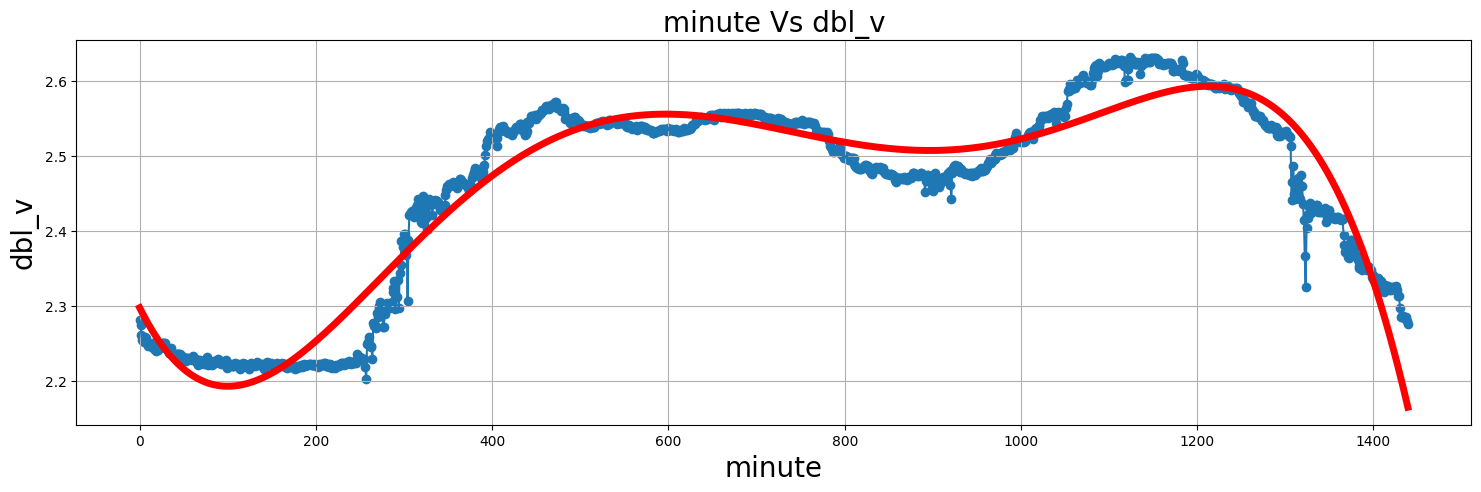

In [34]:
SensorVizWithPrediction(data_group, feature_X, feature_y, y_predict, savefig = False)

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
Rsquare2 = r2_score(y, y_predict)
MSE = mean_squared_error(y, y_predict)
RMSE = mean_squared_error(y, y_predict, squared = False)
MAE = mean_absolute_error(y, y_predict)

print(f"Rsquare2 : {Rsquare2}")
print(f"Mean Square Error : {MSE}")
print(f"Root Mean Square Error : {RMSE}")
print(f"Mean Absolute Error : {MAE}")

Rsquare2 : 0.9236797801453586
Mean Square Error : 0.0013191109562458825
Root Mean Square Error : 0.03631956712635604
Mean Absolute Error : 0.028896109960784618


<Figure size 2000x500 with 0 Axes>

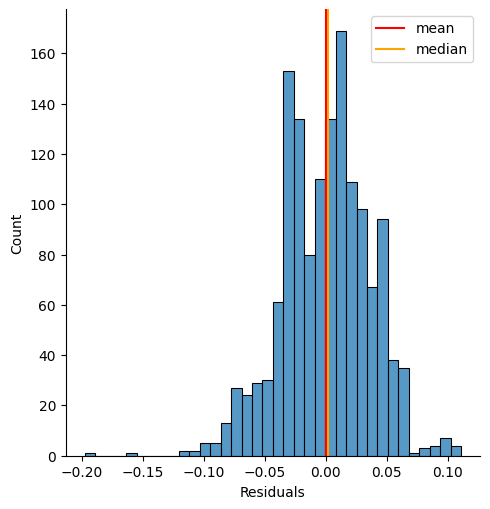

In [36]:
# Model Assessment
residuals = y - y_predict
plt.figure(figsize=(20,5))
sns.displot(residuals)
plt.axvline(x = np.mean(residuals), color = 'red', label = 'mean')
plt.axvline(x = np.median(residuals), color = 'orange', label = 'median')
plt.xlabel("Residuals")
plt.legend(loc = "upper right")
plt.show()

In [37]:
std = data_deviceid_second_apluc['dbl_v'].std()
y_predict_upBound = y_predict + 3*std
# Kiểm tra nếu tất cả các giá trị đều lớn hơn 0
if np.all((y_predict - 3*std) > 0):
    y_predict_lowBound = y_predict - 3*std
else:
    y_predict_lowBound = np.maximum(y_predict - 3*std, 0)

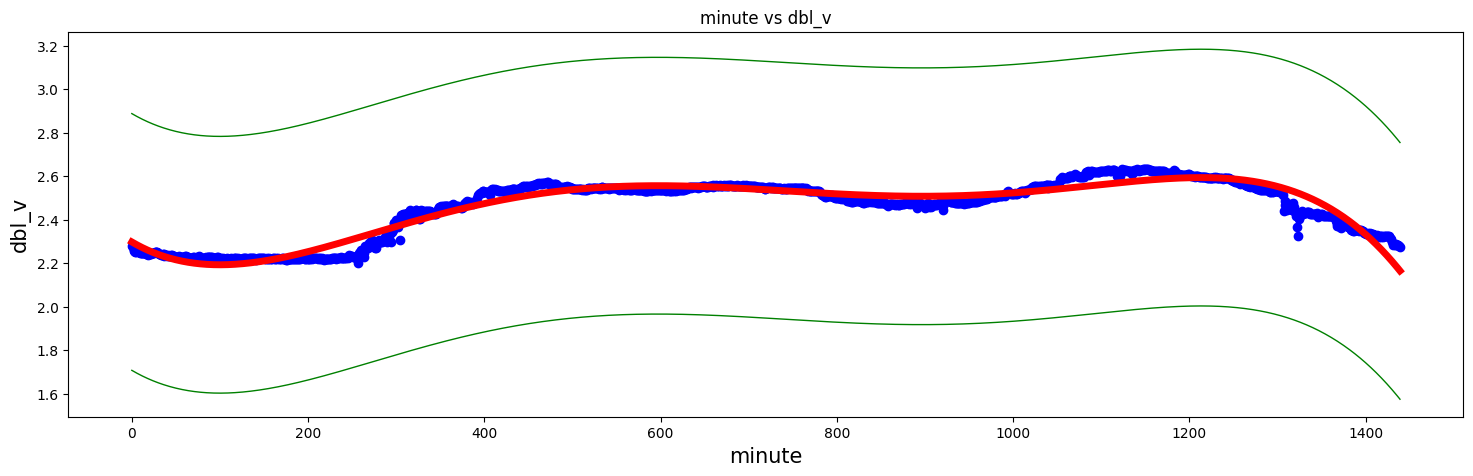

In [38]:
plt.figure(figsize=(18, 5))
plt.scatter(X,y, color = "blue")
plt.plot(X, y_predict, color = "red", linewidth = 5)
plt.plot(X, y_predict_upBound, color = "green", linewidth = 1)
plt.plot(X, y_predict_lowBound, color = "green", linewidth = 1)
plt.title(f"{feature_X} vs {feature_y}")
plt.xlabel(feature_X, size = 15)
plt.ylabel(feature_y, size = 15)
plt.show()

In [39]:
LogDF = pd.DataFrame(columns = ["true_label", "predicted_label", "conf_lower", "conf_upper"])
LogDF["true_label"] = y
LogDF["predicted_label"] = y_predict
LogDF["conf_lower"] = y_predict_lowBound
LogDF["conf_upper"] = y_predict_upBound
LogDF["Alarm"] = (LogDF["true_label"] < LogDF["conf_lower"]) | (LogDF["true_label"] > LogDF["conf_upper"])
LogDF["Percent"] = 0
# Điều kiện khi true_label nhỏ hơn conf_lower (lệch xuống)
LogDF.loc[LogDF["true_label"] < LogDF["conf_lower"], "Percent"] = \
    (LogDF["conf_lower"] - LogDF["true_label"]) / LogDF["conf_lower"] * 100
# Điều kiện khi true_label lớn hơn conf_upper (lệch lên)
LogDF.loc[LogDF["true_label"] > LogDF["conf_upper"], "Percent"] = \
    (LogDF["true_label"] - LogDF["conf_upper"]) / LogDF["conf_upper"] * 100
LogDF["Percent"] = round(LogDF["Percent"],2)
display(LogDF)
print("Alarm Data : ")
display(LogDF[LogDF["Alarm"] == True])

,true_label,predicted_label,conf_lower,conf_upper,Alarm,Percent
0,2.28,2.30,1.71,2.89,False,0
1,2.27,2.29,1.70,2.88,False,0
2,2.26,2.29,1.70,2.88,False,0
3,2.25,2.29,1.70,2.88,False,0
4,2.25,2.29,1.70,2.88,False,0
...,...,...,...,...,...,...
1435,2.28,2.18,1.59,2.77,False,0
1436,2.28,2.18,1.59,2.77,False,0
1437,2.29,2.17,1.58,2.76,False,0
1438,2.28,2.17,1.58,2.76,False,0


Alarm Data : 


,true_label,predicted_label,conf_lower,conf_upper,Alarm,Percent


In [40]:
LogDF['minute'] = LogDF.index
print(LogDF.head())
LogDF[['minute','conf_lower', 'conf_upper']].to_csv(f'Confident_range\Áp lực\{list_deviceid[0]}.csv')

   true_label  predicted_label  conf_lower  conf_upper  Alarm  Percent  minute
0        2.28             2.30        1.71        2.89  False        0       0
1        2.27             2.29        1.70        2.88  False        0       1
2        2.26             2.29        1.70        2.88  False        0       2
3        2.25             2.29        1.70        2.88  False        0       3
4        2.25             2.29        1.70        2.88  False        0       4
